In [1]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

C:\Users\raahu\AppData\Local\Temp\ipykernel_12840\2083384743.py:22: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:264.)
  plt.scatter(data[np.where(labels == 0), 0], data[np.where(labels == 0), 1])


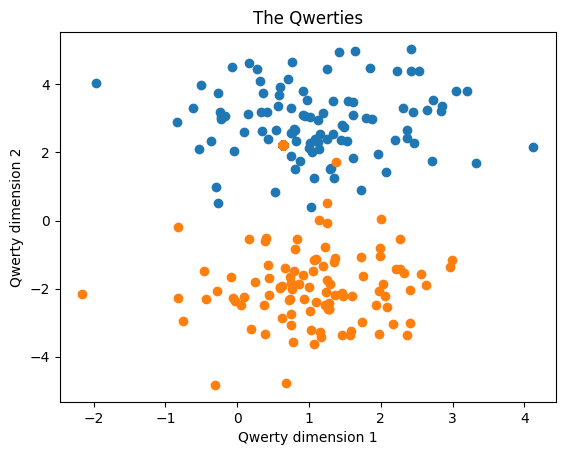

In [2]:
# Create data
nPerClust = 100
blur = 1

A = [1, 3]
B = [1, -2]

# Generate data
a = [A[0] + np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur] 
b = [B[0] + np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur] 


# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

plt.scatter(data[np.where(labels == 0), 0], data[np.where(labels == 0), 1])
plt.scatter(data[np.where(labels == 1), 0], data[np.where(labels == 1), 1])
plt.title('The Qwerties')
plt.xlabel('Qwerty dimension 1')
plt.ylabel('Qwerty dimension 2')
plt.show()


In [3]:
def createANNmodel(learningRate):

    # model architecture
    ANNclassify = nn.Sequential(
        nn.Linear(2,16),
        nn.ReLU(),
        nn.Linear(16,1),
        nn.ReLU(),
        nn.Linear(1,1),
        nn.Sigmoid()
    )

    # loss function
    lossfun = nn.BCELoss()

    # optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learningRate)

    # model output
    return ANNclassify, lossfun, optimizer

In [4]:
## a function to train the model

# a fixed parameter
numepochs = 1000

def trainTheModel(ANNmodel):

    # initialize losses
    losses = torch.zeros(numepochs)

    # loop over epochs
    for epochi in range(numepochs):

        # forward pass
        yHat = ANNmodel(data)

        # compute loss
        loss = lossfun(yHat, labels)
        losses[epochi] = loss

        # Back prop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 

        
    # final forward pass
    predictions = ANNmodel(data)

    totalacc = 100*torch.mean(((predictions>.5)==labels).float())

    return losses, predictions, totalacc

Final accuracy: 99%


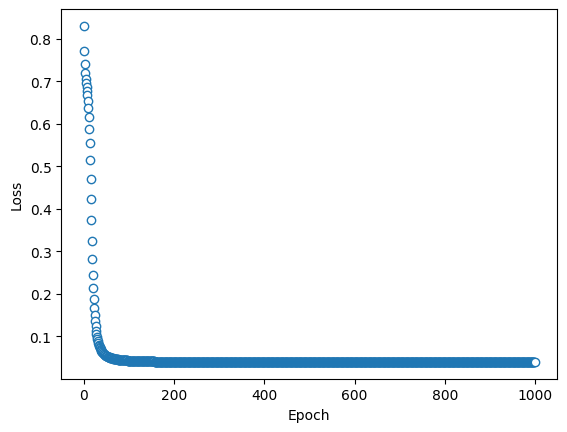

In [9]:
# create everything
ANNclassify, lossfun, optimizer = createANNmodel(0.09)

# run it 
losses, predictions, totalacc = trainTheModel(ANNclassify)

# report accuracy
print('Final accuracy: %g%%' %totalacc)

# show the losses
plt.plot(losses.detach(), 'o', markerfacecolor = 'w', linewidth = .1)
plt.xlabel('Epoch'), plt.ylabel('Loss')
plt.show()

In [6]:
# learning rates 
learningrates = np.linspace(0.001,.1,50)

# initalize 
accBYLR = []
allLosses = np.zeros((len(learningrates),numepochs))

# the loop
for i, lr in enumerate(learningrates):

    # create and run the model
    ANNclassify, lossfun, optimizer = createANNmodel(lr)
    losses, predictions, totalacc = trainTheModel(ANNclassify)

    # store the results
    accBYLR.append(totalacc)
    allLosses[i,:] = losses.detach()


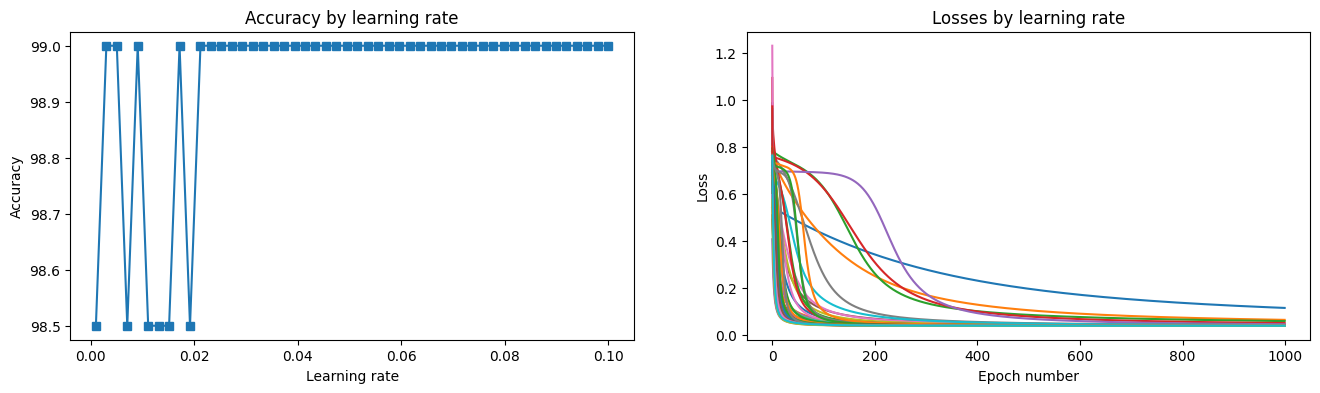

In [7]:
# plot the results
fig, ax = plt.subplots(1,2, figsize = (16, 4))

ax[0].plot(learningrates, accBYLR, 's-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title("Accuracy by learning rate")

ax[1].plot(allLosses.T)
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel("Epoch number")
ax[1].set_ylabel('Loss')
plt.show()